# mixture of Gaussian

In the following segments we create a mixture model dataset with 3 coefficient.

In [1]:
#creating the dataset
set.seed(12345)
n = 400

gen.mix <- function(n,mu,k,sig){
  library(MASS)
  
  d = length(mu[1,]) # dim of the data points
  
  results = array(NA,c(n,d))
  for(i in 1:n){
    
    results[i,] = mvrnorm(n = 1,mu = mu[k[i],],Sigma = sig[, ,k[i]])
  }
  return(results)
}
# number of component is 3
pi  <- c(.3,.5,.2)   # mixing coeffs

# the data is in 2-D
# we start with 3 vector of size for mu

mu = matrix(NA, ncol = 2,nrow = 3)
mu = matrix(c(17,8
              ,18,9.5,
              19,7.7),ncol = 2,byrow = TRUE)

# covariance matrix is sigma :: a 3 matrix of size 2*2 (one for each class)

# create an empty array for sigma

sigs = array(rep(NA),c(2,2,3)) # 3D matrix

sigs[ , , 1] = matrix(c(.3,.2,.2,.3),ncol = 2,byrow = TRUE)
sigs[ , , 2] = matrix(c(.3,-.2,-.2,.3),ncol = 2,byrow = TRUE)
sigs[ , , 3] = matrix(c(.3,.2,.2,.3),ncol = 2,byrow = TRUE)

classes = sample(1:3,size = n,replace = TRUE, prob=pi)
#dataset constructed by a mixture of three Gaussians
data = gen.mix(n = 400,k = classes,sig = sigs,mu = mu)

dev.new()
plot(data,col=c(2,11,4)[classes],pch=19, xlab="X1", ylab="X2")




Warning message:
"package 'MASS' was built under R version 4.0.5"


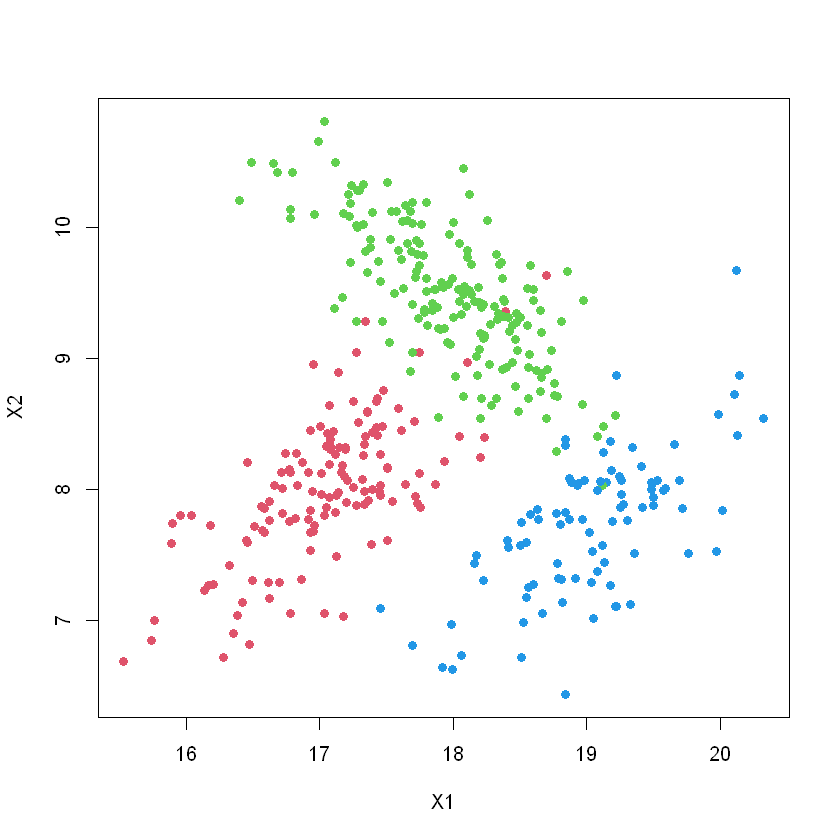

In [2]:
plot(data,col=c(2,11,4)[classes],pch=19, xlab="X1", ylab="X2")


# Kmeans

 ### dataset:
 
 $x=(x_1,\ldots,x_n)$

$K$

different classes

#### the objective function:


$J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \| x_n - \mu_k \|^2$

we wish to assign each datapoint $x_i$ to a cluster $k$, such that the points of the same cluster are closer to each other, than to the points of the other clusters.

In [3]:
##########################################
############K-Means#######################


k_means = function(dataset,K, max_iter = 100 ){
  
  d = ncol(dataset) #number of data dimension
  N = nrow(dataset) #number of data
  ranges = sapply(1:d, function(x) range(dataset[,x])) # the range for dimension
  
  #initializing cluster centers to a Random value
  
  mu = t(replicate(K,sapply(1:d, function(x) runif(1,ranges[1,x],ranges[2,x]))))
  
  
  # to get the class from the maximum value of indicator for each data
  
  get_class <- function(rnk)
    apply(rnk, 1, function(x) which.max(x))
  
  rnk = matrix(rep(0,N*K),nrow=N,ncol=K)
  old_class = get_class(rnk)
  
  # the K-means Algorithm
  
  for (it in 1:max_iter) {
    
    # update indicators for each datapoint
    
    for(n in 1:N){
    
        distance = sapply(1:K, function(k) norm(as.matrix(dataset[n,]) - mu[k,],"F"))
        rnk[n, which.min(distance)] = 1
      
    }
    
    classes = get_class(rnk)
    
    if(all(old_class == classes))
      break # we have reached convergence
    
    old_class = classes
    
    #updating centers
    
    for(k in 1:K){
      mu[k,] = rnk[,k] %*% dataset /sum(rnk[,k])
      }
    
  }
  
  
  list(mu = mu, pred = classes)

}





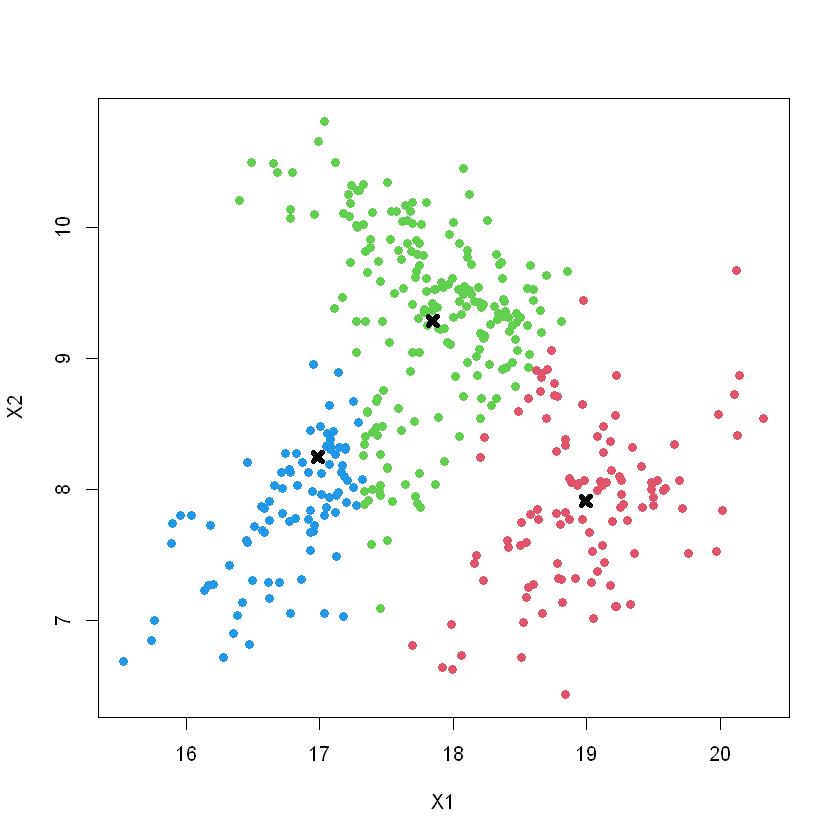

In [4]:
resuts = k_means(data,3)

plot(data,pch=19,col = c(2,11,4)[resuts$pred], xlab="X1", ylab="X2")

#plotcenters

points(resuts$mu,pch = 4,lwd =5 )